In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [2]:
dataset_train = pd.read_csv('data/Fiyatveri.csv',sep=";")
training_set= dataset_train.iloc[:, 1 :2].values

In [3]:
sc= MinMaxScaler(feature_range = (0 , 1))
training_set_scaled =sc.fit_transform(training_set)

In [4]:
X_train = []
y_train =[]
for i in range (60,1156):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train , y_train =np.array(X_train), np.array(y_train)

In [5]:
X_train =np.reshape(X_train,(X_train.shape[0] , X_train.shape[1] , 1 ))

In [6]:
def model_creator(X_train):
    regressor = Sequential()
    regressor.add(LSTM(units = 50  , return_sequences = True , input_shape = (X_train.shape[1] , 1)     ))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50  , return_sequences = True  ))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50  , return_sequences = True  ))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50 ))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units= 1))
    regressor.compile(optimizer='adam', loss='mean_squared_error')
    return regressor

In [7]:
regressor = model_creator(X_train)
regressor.fit(X_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000
35/35 [==============================] - 3s 75ms/step - loss: 0.0076
Epoch 2/1000
35/35 [==============================] - 3s 90ms/step - loss: 0.0034
Epoch 3/1000
35/35 [==============================] - 3s 83ms/step - loss: 0.0034
Epoch 4/1000
35/35 [==============================] - 3s 76ms/step - loss: 0.0024
Epoch 5/1000
35/35 [==============================] - 3s 79ms/step - loss: 0.0026
Epoch 6/1000
35/35 [==============================] - 3s 76ms/step - loss: 0.0016
Epoch 7/1000
35/35 [==============================] - 3s 81ms/step - loss: 0.0013
Epoch 8/1000
35/35 [==============================] - 3s 76ms/step - loss: 0.0015
Epoch 9/1000
35/35 [==============================] - 3s 74ms/step - loss: 0.0010
Epoch 10/1000
35/35 [==============================] - 3s 82ms/step - loss: 0.0014
Epoch 11/1000
35/35 [==============================] - 3s 81ms/step - loss: 0.0014
Epoch 12/1000
35/35 [==============================] - 3s 82ms/step - loss: 0.0016
Epoch 13/1000

35/35 [==============================] - 3s 77ms/step - loss: 5.5333e-04
Epoch 190/1000
35/35 [==============================] - 3s 80ms/step - loss: 3.7962e-04
Epoch 191/1000
35/35 [==============================] - 3s 83ms/step - loss: 5.4518e-04
Epoch 192/1000
35/35 [==============================] - 3s 75ms/step - loss: 5.1306e-04
Epoch 193/1000
35/35 [==============================] - 3s 82ms/step - loss: 6.2750e-04
Epoch 194/1000
35/35 [==============================] - 3s 82ms/step - loss: 6.2077e-04
Epoch 195/1000
35/35 [==============================] - 3s 73ms/step - loss: 7.9243e-04
Epoch 196/1000
35/35 [==============================] - 3s 74ms/step - loss: 5.6863e-04
Epoch 197/1000
35/35 [==============================] - 3s 80ms/step - loss: 4.0635e-04
Epoch 198/1000
35/35 [==============================] - 3s 78ms/step - loss: 4.2198e-04
Epoch 199/1000
35/35 [==============================] - 3s 80ms/step - loss: 5.8210e-04
Epoch 200/1000
35/35 [=========================

35/35 [==============================] - 3s 78ms/step - loss: 4.3278e-04
Epoch 283/1000
35/35 [==============================] - 3s 79ms/step - loss: 5.9464e-04
Epoch 284/1000
35/35 [==============================] - 3s 78ms/step - loss: 5.3694e-04
Epoch 285/1000
35/35 [==============================] - 3s 79ms/step - loss: 4.1680e-04
Epoch 286/1000
35/35 [==============================] - 3s 83ms/step - loss: 4.9273e-04
Epoch 287/1000
35/35 [==============================] - 3s 85ms/step - loss: 5.2613e-04
Epoch 288/1000
35/35 [==============================] - 3s 79ms/step - loss: 3.9967e-04
Epoch 289/1000
35/35 [==============================] - 3s 85ms/step - loss: 4.2933e-04
Epoch 290/1000
35/35 [==============================] - 3s 89ms/step - loss: 6.0705e-04
Epoch 291/1000
35/35 [==============================] - 3s 79ms/step - loss: 5.2756e-04
Epoch 292/1000
35/35 [==============================] - 3s 85ms/step - loss: 6.0597e-04
Epoch 293/1000
35/35 [=========================

35/35 [==============================] - 3s 79ms/step - loss: 4.1419e-04
Epoch 469/1000
35/35 [==============================] - 3s 81ms/step - loss: 2.5855e-04
Epoch 470/1000
35/35 [==============================] - 3s 80ms/step - loss: 2.3916e-04
Epoch 471/1000
35/35 [==============================] - 3s 80ms/step - loss: 2.6126e-04
Epoch 472/1000
35/35 [==============================] - 3s 85ms/step - loss: 3.2350e-04
Epoch 473/1000
35/35 [==============================] - 3s 86ms/step - loss: 3.3276e-04
Epoch 474/1000
35/35 [==============================] - 3s 86ms/step - loss: 3.5052e-04
Epoch 475/1000
35/35 [==============================] - 3s 85ms/step - loss: 3.4365e-04
Epoch 476/1000
35/35 [==============================] - 3s 82ms/step - loss: 3.4624e-04
Epoch 477/1000
35/35 [==============================] - 3s 84ms/step - loss: 3.5053e-04
Epoch 478/1000
35/35 [==============================] - 3s 82ms/step - loss: 4.1227e-04
Epoch 479/1000
35/35 [=========================

35/35 [==============================] - 3s 85ms/step - loss: 2.1542e-04
Epoch 562/1000
35/35 [==============================] - 3s 86ms/step - loss: 3.2294e-04
Epoch 563/1000
35/35 [==============================] - 3s 84ms/step - loss: 2.7433e-04
Epoch 564/1000
35/35 [==============================] - 3s 73ms/step - loss: 3.1437e-04
Epoch 565/1000
35/35 [==============================] - 3s 76ms/step - loss: 2.4771e-04
Epoch 566/1000
35/35 [==============================] - 3s 79ms/step - loss: 4.6694e-04
Epoch 567/1000
35/35 [==============================] - 3s 79ms/step - loss: 3.2376e-04
Epoch 568/1000
35/35 [==============================] - 3s 78ms/step - loss: 2.9250e-04
Epoch 569/1000
35/35 [==============================] - 3s 81ms/step - loss: 2.9139e-04
Epoch 570/1000
35/35 [==============================] - 3s 81ms/step - loss: 2.6424e-04
Epoch 571/1000
35/35 [==============================] - 3s 80ms/step - loss: 3.1915e-04
Epoch 572/1000
35/35 [=========================

35/35 [==============================] - 3s 89ms/step - loss: 2.2897e-04
Epoch 655/1000
35/35 [==============================] - 3s 85ms/step - loss: 2.7225e-04
Epoch 656/1000
35/35 [==============================] - 3s 80ms/step - loss: 2.5630e-04
Epoch 657/1000
35/35 [==============================] - 3s 80ms/step - loss: 2.8998e-04
Epoch 658/1000
35/35 [==============================] - 3s 75ms/step - loss: 2.8175e-04
Epoch 659/1000
35/35 [==============================] - 3s 79ms/step - loss: 2.9387e-04
Epoch 660/1000
35/35 [==============================] - 3s 80ms/step - loss: 3.8087e-04
Epoch 661/1000
35/35 [==============================] - 3s 75ms/step - loss: 4.0047e-04
Epoch 662/1000
35/35 [==============================] - 3s 83ms/step - loss: 2.5584e-04
Epoch 663/1000
35/35 [==============================] - 3s 85ms/step - loss: 2.4352e-04
Epoch 664/1000
35/35 [==============================] - 3s 76ms/step - loss: 2.7168e-04
Epoch 665/1000
35/35 [=========================

35/35 [==============================] - 3s 79ms/step - loss: 2.0049e-04
Epoch 841/1000
35/35 [==============================] - 3s 87ms/step - loss: 2.1590e-04
Epoch 842/1000
35/35 [==============================] - 3s 81ms/step - loss: 1.9515e-04
Epoch 843/1000
35/35 [==============================] - 3s 78ms/step - loss: 2.6588e-04
Epoch 844/1000
35/35 [==============================] - 3s 73ms/step - loss: 1.6811e-04
Epoch 845/1000
35/35 [==============================] - 3s 80ms/step - loss: 2.9093e-04
Epoch 846/1000
35/35 [==============================] - 3s 83ms/step - loss: 1.9410e-04
Epoch 847/1000
35/35 [==============================] - 3s 75ms/step - loss: 2.7050e-04
Epoch 848/1000
35/35 [==============================] - 3s 77ms/step - loss: 3.1791e-04
Epoch 849/1000
35/35 [==============================] - 3s 75ms/step - loss: 2.1851e-04
Epoch 850/1000
35/35 [==============================] - 3s 80ms/step - loss: 3.2495e-04
Epoch 851/1000
35/35 [=========================

In [8]:
dataset_test = pd.read_csv('data/testBitcoin.csv',sep=';')
real_stock_price= dataset_test.iloc[:, 1 :2].values

In [9]:
dataset_total=pd.concat((dataset_train['Price'],dataset_test['Price']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60 : ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [10]:
X_test= []
for i in range (60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test =np.reshape(X_test,(X_test.shape[0] , X_test.shape[1] , 1 ))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform (predicted_stock_price)

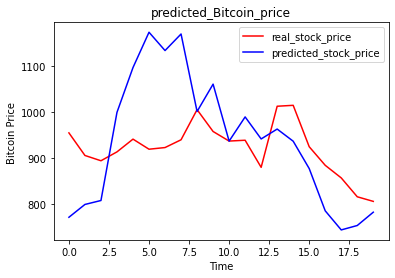

In [11]:
plt.plot(real_stock_price,color = 'red' ,label ='real_stock_price')

plt.plot(predicted_stock_price,color = 'blue' ,label ='predicted_stock_price')

plt.title ('predicted_Bitcoin_price')

plt.xlabel('Time')

plt.ylabel('Bitcoin Price ')

plt.legend()

plt.show()


In [14]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(real_stock_price,predicted_stock_price)

0.1088806570119945